**12. Projekt**
=================

## **1. Cel projektu**

#### Celem projektu jest przewidzenie ze zbioru danych jakie widomości są Fake Newsami, użyte algorytmy:
* TfidfVectorizer
* PassiveAggressiveClassifier

Opis algorytmów.

**TF (Term Frequency):** Liczba wystąpień danego słowa w dokumencie to jego częstotliwość występowania. Wyższa wartość oznacza, że dany termin pojawia się częściej niż inne, a zatem dokument jest dobrze dopasowany, jeśli termin ten jest częścią wyszukiwanych słów.

Wektorator TfidfVectorizer przekształca zbiór dokumentów w macierz cech TF-IDF.

**Algorytmy pasywno-agresywne** to algorytmy uczące się online. Taki algorytm pozostaje pasywny w przypadku poprawnego wyniku klasyfikacji, a staje się agresywny w przypadku błędnego obliczenia, aktualizując i dostosowując się. W przeciwieństwie do większości innych algorytmów nie jest on zbieżny. Jego zadaniem jest dokonywanie aktualizacji korygujących stratę, powodujących bardzo niewielkie zmiany w normie wektora wag.





#### Dane news.csv wykorzstane do uczenia pochodzą ze strony https://paperswithcode.com/datasets?task=fake-news-detection

## **2. Importowanie potrzebnych bibliotek**

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## **3. Wczytanie danych**

In [56]:
df=pd.read_csv('news.csv')
df.shape
df.head(20)

Unnamed: 0                                              title  \
0         8476                       You Can Smell Hillary’s Fear   
1        10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2         3608        Kerry to go to Paris in gesture of sympathy   
3        10142  Bernie supporters on Twitter erupt in anger ag...   
4          875   The Battle of New York: Why This Primary Matters   
5         6903                                        Tehran, USA   
6         7341  Girl Horrified At What She Watches Boyfriend D...   
7           95                  ‘Britain’s Schindler’ Dies at 106   
8         4869  Fact check: Trump and Clinton at the 'commande...   
9         2909  Iran reportedly makes new push for uranium con...   
10        1357  With all three Clintons in Iowa, a glimpse at ...   
11         988  Donald Trump’s Shockingly Weak Delegate Game S...   
12        7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13        7623       10 Ways America Is Preparing for World War 3   
14        1571                   Trump takes on Cruz, but lightly   
15        4739                         How women lead differently   
16        7737  Shocking! Michele Obama & Hillary Caught Glamo...   
17        8716  Hillary Clinton in HUGE Trouble After America ...   
18        3304  What's in that Iran bill that Obama doesn't like?   
19        3078  The 1 chart that explains everything you need ...   

                                                 text label  
0   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1   Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2   U.S. Secretary of State John F. Kerry said Mon...  REAL  
3   — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4   It's primary day in New York and front-runners...  REAL  
5     \nI’m not an immigrant, but my grandparents ...  FAKE  
6   Share This Baylee Luciani (left), Screenshot o...  FAKE  
7   A Czech stockbroker who saved more than 650 Je...  REAL  
8   Hillary Clinton and Donald Trump made some ina...  REAL  
9   Iranian negotiators reportedly have made a las...  REAL  
10  CEDAR RAPIDS, Iowa — “I had one of the most wo...  REAL  
11  Donald Trump’s organizational problems have go...  REAL  
12  Click Here To Learn More About Alexandra's Per...  FAKE  
13  October 31, 2016 at 4:52 am \nPretty factual e...  FAKE  
14  Killing Obama administration rules, dismantlin...  REAL  
15  As more women move into high offices, they oft...  REAL  
16  Shocking! Michele Obama & Hillary Caught Glamo...  FAKE  
17  0 \nHillary Clinton has barely just lost the p...  FAKE  
18  Washington (CNN) For months, the White House a...  REAL  
19  While paging through Pew's best data visualiza...  REAL

In [57]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## **4. Wizualizacja cech na histogramach**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d81ab470>]],
      dtype=object)

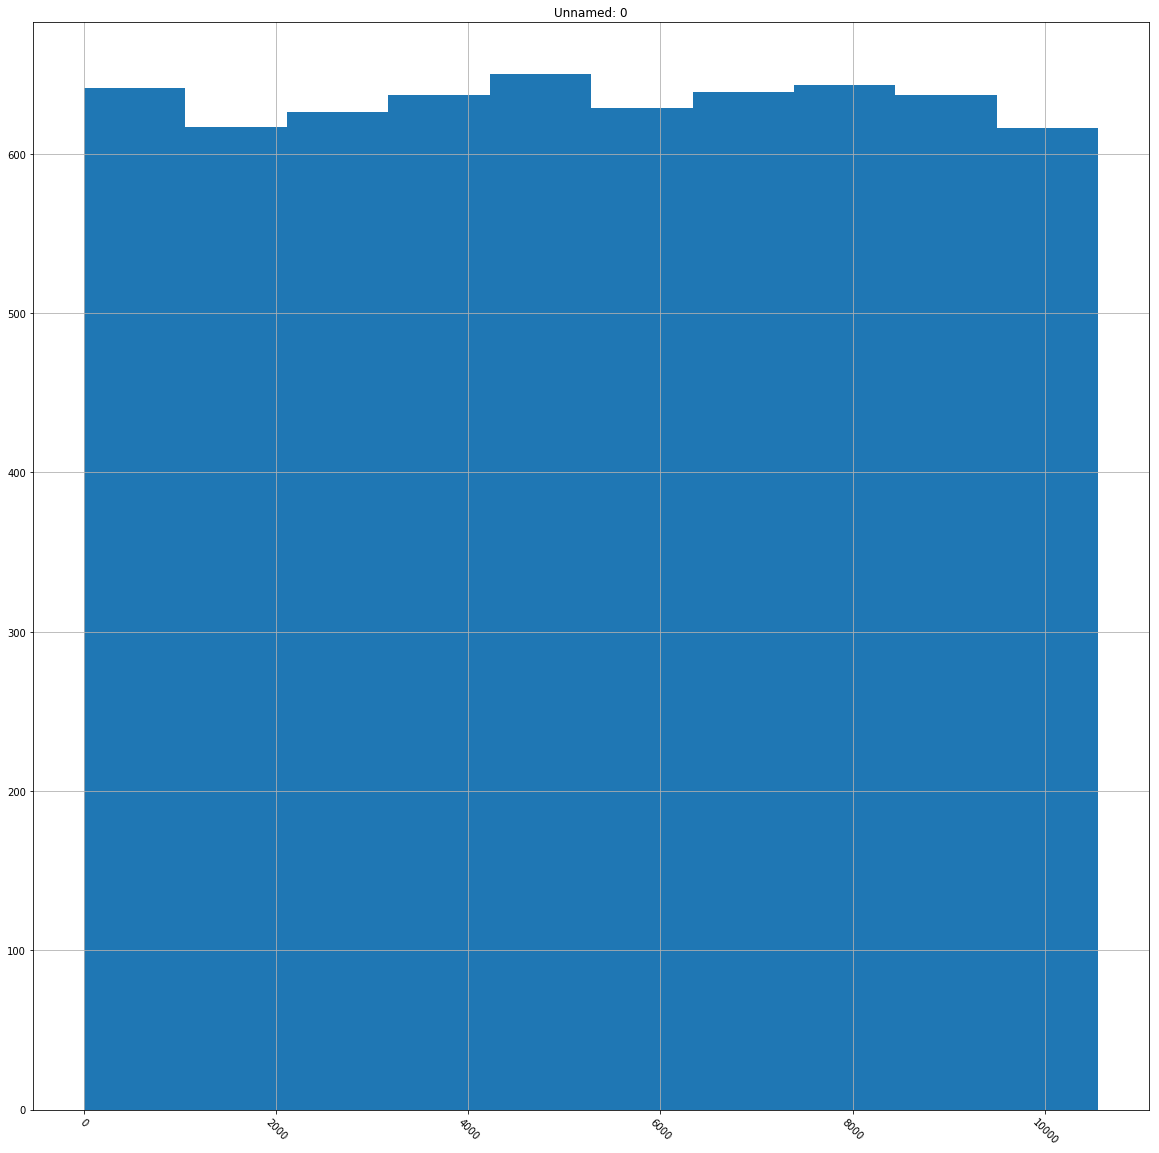

In [52]:
df.hist(figsize=(20,20), xrot=-45)

## **5. Podział na zbiór testowy i treningowy**

In [53]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

## **6. Trenowanie**

### 6.1. Użycie TFIDF

Inicjalizuje wektor TfidfVectorizer ze słowami stop z języka angielskiego i maksymalną częstotliwością występowania w dokumentach wynoszącą 0,7 (terminy o wyższej częstotliwości występowania w dokumentach zostaną odrzucone). Stop words to najczęściej występujące słowa w danym języku, które należy odfiltrować przed przetworzeniem danych języka naturalnego. Wektoryzator TfidfVectorizer przekształca zbiór nieprzetworzonych dokumentów w macierz cech TF-IDF.



In [58]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### 6.2. PassiveAggressiveClassifier

In [55]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Przewidzenie na zbiorze testowym i kalkulacja dokładnośći
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Dokładność: {round(score*100,2)}%')

Dokładność: 92.82%


/usr/lib/python3/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


## **8. Podsumowanie wyników**

W tym modelu uzyskaliśmy dokładność 92,82%. Na koniec wydrukujmy macierz konfuzji, aby uzyskać wgląd w liczbę fałszywych i prawdziwych wyników negatywnych i pozytywnych.

In [60]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 43, 586]])

W przypadku tego modelu mamy 590 prawdziwych wyników dodatnich, 586 prawdziwych wyników ujemnych, 43 fałszywe wyniki dodatnie i 48 fałszywych wyników ujemnych.